### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [2]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving vehicle.csv to vehicle.csv


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import io
vehicle_data = pd.read_csv(io.BytesIO(uploaded["vehicle.csv"]))

vehicle_data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [5]:
#checking the column data information
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [6]:
# 5 point summary statistics
vehicle_data.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [7]:
#checking for the null values
vehicle_data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [8]:
# shape of the data
vehicle_data.shape

(846, 19)

In [14]:
clean_vehicle_data = vehicle_data.dropna(inplace=False)

clean_vehicle_data.shape

(813, 19)

### 2. Print/ Plot the dependent (categorical variable) - Class column

In [0]:
import seaborn as sns

In [16]:
vehicle_data['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

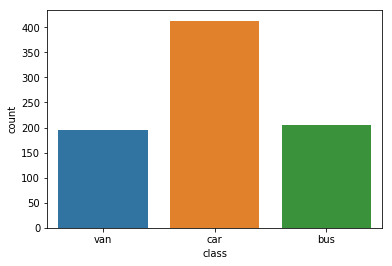

In [17]:
sns.countplot(data=clean_vehicle_data, x='class')

### Check for any missing values in the data 

In [18]:
clean_vehicle_data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [19]:
clean_vehicle_data.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

No null/na value present in clean_vehicle_data


### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
from sklearn.model_selection import train_test_split
X=clean_vehicle_data.drop('class',axis=1, inplace=False)
y=clean_vehicle_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5, test_size=0.3)

In [22]:
z_scaler = StandardScaler()
z_scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaled_X_train = z_scaler.transform(X_train)
scaled_X_test = z_scaler.transform(X_test)

### K - Means Clustering

### Assign a dummy array called Cluster_error

In [0]:
cluster_errors = []

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [0]:
from sklearn.cluster import KMeans

cluster_range = range(2, 10)

In [0]:
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(scaled_X_train)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  

In [0]:
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )

In [82]:
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,6089.677004
1,3,5015.358229
2,4,4018.602764
3,5,3626.195294
4,6,3255.758051
5,7,3029.659083
6,8,2865.029873
7,9,2749.600249


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

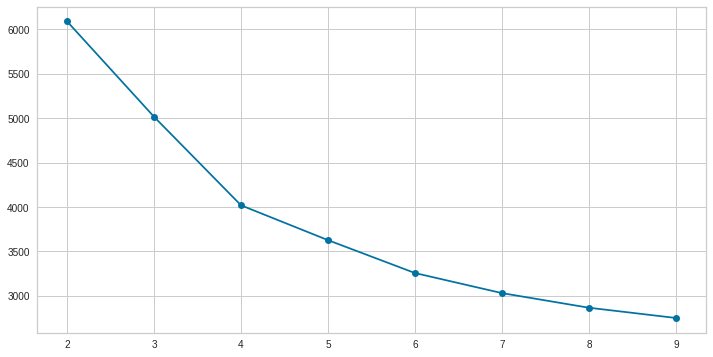

In [83]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

### Find out the optimal value of K

In [0]:
# optimal k can be 4

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [0]:
kmeans = KMeans( n_clusters = 4, n_init = 5, init='k-means++')
kmeans.fit(scaled_X_train)
labels_kmeans = kmeans.labels_                     # capture the cluster lables
centroids_kmeans = kmeans.cluster_centers_         # capture the centroids


You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [85]:
centroids_kmeans

array([[-0.88435319, -0.49761265, -0.80229703, -1.02325131, -0.49853135,
        -0.27239637, -0.76282029,  0.83157625, -0.73122122, -0.44466081,
        -0.78438655, -0.77229662, -0.39434018,  0.67116185, -0.12356577,
        -0.23448682, -0.98940425, -1.00804069],
       [ 1.12824144,  1.15998852,  1.18187811,  0.96316375,  0.11515006,
         0.19709968,  1.27385958, -1.19003223,  1.27812233,  1.06010173,
         1.1767468 ,  1.28718507,  1.07546087, -0.11569052,  0.15030855,
         0.21879133,  0.01904928,  0.18579998],
       [-0.87788948,  0.03338009, -0.42492022,  2.94925087,  6.8646395 ,
         8.66356352, -0.5587804 ,  0.48873865, -0.56014371,  0.23804842,
         1.79408404, -0.61233486,  0.18790275,  5.25621772, -0.12413873,
        -0.26434155, -0.79413097, -0.6198093 ],
       [-0.19981834, -0.61632013, -0.33966404, -0.03400752,  0.14706061,
        -0.19391922, -0.45770309,  0.31809651, -0.49097483, -0.5789542 ,
        -0.41911894, -0.4596476 , -0.6384391 , -0.676

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [0]:
# Let us put the raw centroid values into a dataframe under respective columns
centroid_df = pd.DataFrame(centroids, columns = list(X.columns) )

In [87]:
centroid_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.906059,0.933567,1.159334,1.072904,0.285552,0.161586,1.077608,-1.083170,1.051171,0.755218,1.041961,1.063423,0.891994,-0.302416,-0.426641,0.493960,0.158494,0.348860
1,-0.601040,0.045284,-0.234916,-0.591323,-0.094136,0.079124,-0.470426,0.375806,-0.477057,0.206650,-0.486365,-0.530707,0.039755,0.185287,-0.134465,-0.345340,-0.567896,-0.265838
2,-1.182565,-0.366333,-0.984932,-1.188409,-0.585081,-0.418617,-0.615261,0.614437,-0.644741,-0.379281,-0.604500,-0.672818,-0.072960,1.372253,-0.422807,-0.422779,-1.471566,-1.676873
3,-0.877889,0.033380,-0.424920,2.949251,6.864640,8.663564,-0.558780,0.488739,-0.560144,0.238048,1.794084,-0.612335,0.187903,5.256218,-0.124139,-0.264342,-0.794131,-0.619809
4,-0.408080,-0.848294,-0.890264,-0.582810,-0.159162,-0.245930,-1.032281,1.061079,-0.999279,-0.738320,-1.008742,-0.950743,-0.869466,-0.940890,0.258025,-0.599806,1.270448,1.029883


### Use kmeans.labels_ function to print out the labels of the classes

In [94]:
labels_kmeans

array([3, 1, 0, 0, 0, 0, 3, 0, 2, 1, 0, 1, 3, 1, 1, 3, 3, 1, 1, 1, 0, 3,
       3, 0, 3, 0, 1, 0, 1, 0, 3, 1, 3, 1, 0, 1, 3, 0, 3, 3, 0, 1, 3, 0,
       3, 1, 0, 1, 1, 3, 0, 1, 3, 1, 3, 0, 3, 3, 1, 3, 0, 3, 2, 0, 3, 0,
       3, 1, 3, 1, 3, 3, 0, 1, 0, 3, 1, 1, 0, 0, 0, 1, 0, 0, 0, 3, 3, 0,
       1, 1, 0, 1, 3, 0, 1, 3, 1, 3, 3, 3, 0, 3, 2, 1, 0, 0, 3, 1, 0, 1,
       0, 0, 3, 0, 1, 3, 3, 3, 0, 1, 3, 3, 3, 3, 1, 0, 3, 1, 3, 1, 0, 0,
       0, 1, 1, 0, 3, 1, 3, 0, 1, 0, 1, 0, 0, 0, 0, 1, 3, 3, 3, 0, 1, 2,
       0, 1, 3, 0, 3, 3, 0, 0, 0, 1, 1, 0, 3, 1, 1, 0, 1, 0, 3, 1, 1, 1,
       3, 3, 3, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 3,
       3, 0, 3, 0, 1, 3, 3, 3, 0, 1, 1, 0, 1, 1, 1, 3, 3, 0, 3, 3, 1, 3,
       1, 3, 3, 3, 3, 0, 1, 3, 1, 1, 0, 3, 0, 3, 1, 0, 0, 1, 3, 3, 3, 3,
       3, 3, 3, 0, 1, 0, 1, 1, 3, 3, 0, 1, 1, 1, 0, 1, 0, 3, 0, 0, 0, 3,
       3, 3, 3, 3, 0, 0, 3, 0, 1, 1, 3, 3, 3, 0, 0, 2, 0, 1, 0, 3, 0, 3,
       3, 3, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 3, 0,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [0]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [0]:
df = pd.DataFrame(a)
df1 = pd.DataFrame(b)
df2 = pd.DataFrame(c)
data = [df,df1,df2]

In [124]:
df_new = pd.concat(data, axis=0)
df_new.head()

,0,1
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773


### 10. Use scatter matrix to print all the 3 distributions

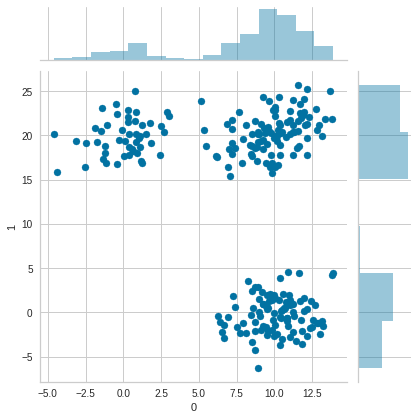

In [125]:
sns.jointplot(data=df_new, x=df_new[0], y=df_new[1])

### 11. Find out the linkage matrix

In [0]:
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [0]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [126]:
# Case 1: Ward Method
Z = linkage(df_new, 'ward')
c, coph_dists = cophenet(Z , pdist(df_new))
print("Ward",c)
# Case 2: Average Linkage
Z = linkage(df_new, 'average')
c, coph_dists = cophenet(Z , pdist(df_new))
print("Average", c)
# Case 3: Complete Linkage
Z = linkage(df_new, 'complete')
c, coph_dists = cophenet(Z , pdist(df_new))
print("Complete",c)
# Case 3: Single Linkage
Z = linkage(df_new, 'single')
c, coph_dists = cophenet(Z , pdist(df_new))
print("Single",c)

Ward 0.9536963071171022
Average 0.9570116112695627
Complete 0.9448184225329517
Single 0.9430374735203884


### 12. Plot the dendrogram for the consolidated dataframe

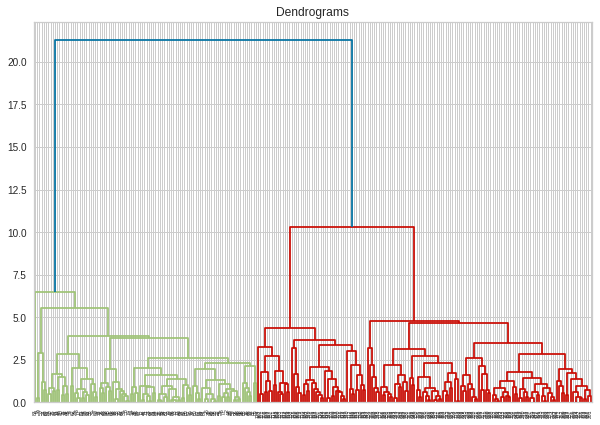

In [116]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_new, method='average'))

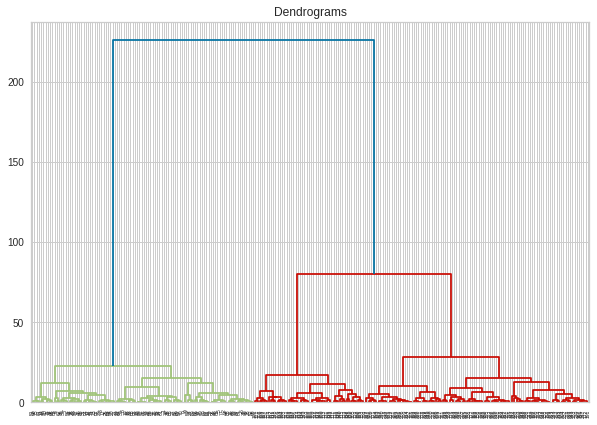

In [127]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_new, method='ward'))

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

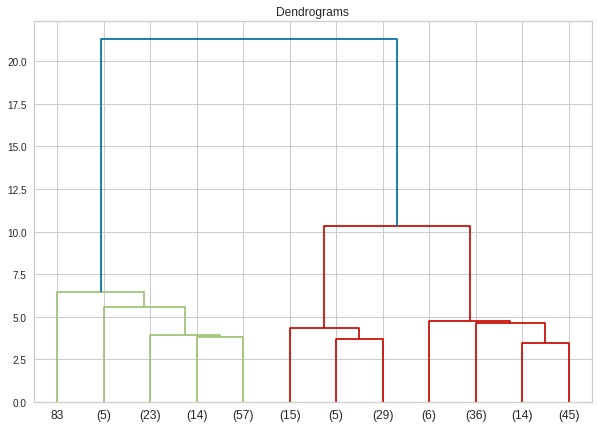

In [137]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_new, method='average'), truncate_mode='lastp', p=12)

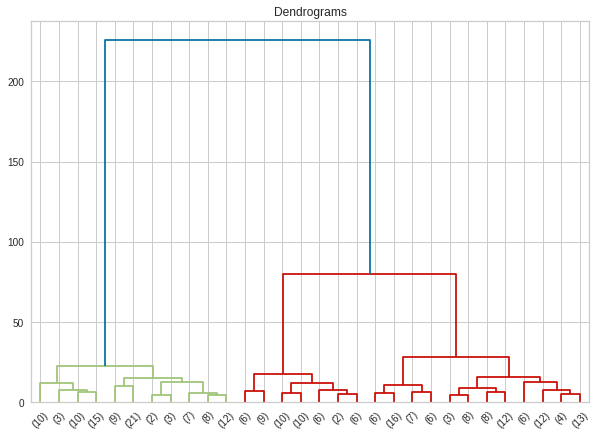

In [129]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_new, method='ward'), truncate_mode='lastp')

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [0]:
https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

### Use matplotlib to visually observe the clusters in 2D space 